In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import os
import random
from scipy.stats import ttest_ind

from matplotlib.legend_handler import HandlerTuple

import matplotlib.transforms as transforms

import scipy.stats as st

RENDER = False
IMAGE = False


#font='Linux Libertine Display O', 
sns.set_theme(style="whitegrid", context="paper", font_scale=1.5, rc={"xtick.bottom": True}) #2.3
palette_white = ['#ffffff', '#ffffff']
palette_burd = ['#4884af', '#e22f27', '#379f55']

fw_mapping = {
    'gtk' : 'GTK3',
    'xcb' : 'XCB',
    'xlib' : 'Xlib',
    
    'FLTK' : 'FLTK',
    'OPENGL_GLEW' : 'GLEW',
    'OPENGL_GLUT' : 'GLUT',
    'SDL2_opengl' : 'SDL2 (OpenGL)',
    'SDL2_opengles2' : 'SDL2 (OpenGLES2)',
    'SDL2_software' : 'SDL2 (Software)',
    'Qt5' : 'Qt5',
    
    'pyqt5' : 'PyQt5',
    'pyqt6' : 'PyQt6',
    'pygame' : 'pygame',
    'pyglet' : 'pyglet',
    'tkinter' : 'tkinter',
    'wxpython' : 'wxPython',
    
    'Java2D' : 'Java2D',
    'JavaSwing' : 'Java Swing'
    
}

def check_rects(row):
    if 'rects' in str(row.framework):
        row.apptype = 'rects'
    elif 'image' in str(row.framework):
        row.apptype = 'image'
    else:
        row.apptype = 'default'
    return row


#df_tmp.framework = df_tmp.framework.str.replace('_rects', '')
#df_tmp.framework = df_tmp.framework.str.replace('_default', '')

def update_fw(row):
    row.framework = fw_mapping[row.framework.replace('_rects', '').replace('_default', '').replace('_image', '')]
    return row

In [2]:
LOGS = [#'allegro_default',
        'FLTK_default',
        'gtk_default',
        'Java2D_default',
        'JavaSwing_default',
        'OPENGL_GLEW_default',
        'OPENGL_GLUT_default',
        'pygame_default',
        'pyglet_default',
        'pyqt5_default',
        'pyqt6_default',
        'Qt5_default',
        'SDL2_opengl',
        'SDL2_opengles2',
        'SDL2_software',
        'tkinter_default',
        'wxpython_default',
        'xcb_default',
        'xlib_default',
        'FLTK_rects',
        'gtk_rects',
        'Java2D_rects',
        'JavaSwing_rects',
        'OPENGL_GLEW_rects',
        'OPENGL_GLUT_rects',
        'pygame_rects',
        'pyglet_rects',
        'pyqt5_rects',
        'pyqt6_rects',
        'Qt5_rects',
        'SDL2_rects_opengl',
        'SDL2_rects_opengles2',
        'SDL2_rects_software',
        'tkinter_rects',
        'wxpython_rects',
        'xcb_rects',
        'xlib_rects',
        'FLTK_image',
        'gtk_image',
        'Java2D_image',
        'JavaSwing_image',
        'OPENGL_GLEW_image',
        'OPENGL_GLUT_image',
        'pygame_image',
        'pyglet_image',
        'pyqt5_image',
        'pyqt6_image',
        'Qt5_image',
        'SDL2_image_opengl',
        'SDL2_image_opengles2',
        'SDL2_image_software',
        'tkinter_image',
        'wxpython_image',
        'xcb_image',
        'xlib_image'
        ]
        
    
#    'SDL2_opengl', 'SDL2_opengles2', 'SDL2_software',
#        'OPENGL_GLEW_default', 'pygame_default', 'tkinter_default',
#        'gtk_default', 'wxpython_default'
#        , 'pyqt5_default', 'OPENGL_GLUT_default', 'JavaAWT_default', 'JavaSwing_default', 'pyqt6_default', 'Qt5_default'
#       ]

dfs = []

for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-01-14_pc-nocomp-xfce4/{log}_fw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'xfce4'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-01-19_pc-nocomp-xfce/{log}_fw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'xfce4'
    dfs.append(df_tmp)

for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-03-07_pc-nocomp-xfce/{log}_fw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'xfce4'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        #df_tmp = pd.read_csv(f'../data/2023-01-12_pc-nocomp/{log}_fw.csv')
        df_tmp = pd.read_csv(f'../data/2023-01-13_pc-nocomp-plasma/{log}_fw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'plasma'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-01-18_pc-nocomp-plasma/{log}_fw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'plasma'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-03-08_pc-nocomp-plasma/{log}_fw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'plasma'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        #df_tmp = pd.read_csv(f'../data/2023-01-12_pc-nocomp/{log}_fw.csv')
        df_tmp = pd.read_csv(f'../data/2023-01-14_pc-nocomp-xorg/{log}_fw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'xorg'
    dfs.append(df_tmp)

for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-01-19_pc-nocomp-xorg/{log}_fw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'xorg'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-03-10_pc-nocomp-xorg/{log}_fw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'xorg'
    dfs.append(df_tmp)
    
df_nocomp = pd.concat(dfs)
df_nocomp.drop(columns=['Unnamed: 0'], inplace=True)
df_nocomp

dfs = []

for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-01-14_pc-comp-xfce4/{log}_fw.csv')
    except:
        continue
    df_tmp['compositor'] = 'on'
    df_tmp['desktop'] = 'xfce4'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-01-19_pc-comp-xfce/{log}_fw.csv')
    except:
        continue
    df_tmp['compositor'] = 'on'
    df_tmp['desktop'] = 'xfce4'
    dfs.append(df_tmp)

for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-03-07_pc-comp-xfce/{log}_fw.csv')
    except:
        continue
    df_tmp['compositor'] = 'on'
    df_tmp['desktop'] = 'xfce4'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-01-13_pc-comp-plasma/{log}_fw.csv')
    except:
        continue
    df_tmp['compositor'] = 'on'
    df_tmp['desktop'] = 'plasma'
    dfs.append(df_tmp)

for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-01-18_pc-comp-plasma/{log}_fw.csv')
    except:
        continue
    df_tmp['compositor'] = 'on'
    df_tmp['desktop'] = 'plasma'
    dfs.append(df_tmp)

for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-03-08_pc-comp-plasma/{log}_fw.csv')
    except:
        continue
    df_tmp['compositor'] = 'on'
    df_tmp['desktop'] = 'plasma'
    dfs.append(df_tmp)
    
df_comp = pd.concat(dfs)
df_comp.drop(columns=['Unnamed: 0'], inplace=True)
df_comp


dfs = []

for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-01-14_pc-nocomp-xfce4/{log}_nofw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'xfce4'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-01-19_pc-nocomp-xfce/{log}_nofw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'xfce4'
    dfs.append(df_tmp)

for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-03-07_pc-nocomp-xfce/{log}_nofw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'xfce4'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        #df_tmp = pd.read_csv(f'../data/2023-01-12_pc-nocomp/{log}_nofw.csv')
        df_tmp = pd.read_csv(f'../data/2023-01-13_pc-nocomp-plasma/{log}_nofw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'plasma'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-01-18_pc-nocomp-plasma/{log}_nofw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'plasma'
    dfs.append(df_tmp)

for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-03-08_pc-nocomp-plasma/{log}_nofw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'plasma'
    dfs.append(df_tmp)

for log in LOGS:
    try:
        #df_tmp = pd.read_csv(f'../data/2023-01-12_pc-nocomp/{log}_nofw.csv')
        df_tmp = pd.read_csv(f'../data/2023-01-14_pc-nocomp-xorg/{log}_nofw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'xorg'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        #df_tmp = pd.read_csv(f'../data/2023-01-12_pc-nocomp/{log}_nofw.csv')
        df_tmp = pd.read_csv(f'../data/2023-01-19_pc-nocomp-xorg/{log}_nofw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'xorg'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-03-10_pc-nocomp-xorg/{log}_nofw.csv')
    except:
        continue
    df_tmp['compositor'] = 'off'
    df_tmp['desktop'] = 'xorg'
    dfs.append(df_tmp)    

df_nocomp_nofw = pd.concat(dfs)
df_nocomp_nofw.drop(columns=['Unnamed: 0', 'fw', 'diff'], inplace=True)
df_nocomp_nofw

dfs = []

for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-01-14_pc-comp-xfce4/{log}_nofw.csv')
    except:
        continue
    df_tmp['compositor'] = 'on'
    df_tmp['desktop'] = 'xfce4'
    dfs.append(df_tmp)

for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-03-07_pc-comp-xfce/{log}_nofw.csv')
    except:
        continue
    df_tmp['compositor'] = 'on'
    df_tmp['desktop'] = 'xfce4'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-01-19_pc-comp-xfce/{log}_nofw.csv')
    except:
        continue
    df_tmp['compositor'] = 'on'
    df_tmp['desktop'] = 'xfce4'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-01-13_pc-comp-plasma/{log}_nofw.csv')
    except:
        continue
    df_tmp['compositor'] = 'on'
    df_tmp['desktop'] = 'plasma'
    dfs.append(df_tmp)
    
for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-01-18_pc-comp-plasma/{log}_nofw.csv')
    except:
        continue
    df_tmp['compositor'] = 'on'
    df_tmp['desktop'] = 'plasma'
    dfs.append(df_tmp)

for log in LOGS:
    try:
        df_tmp = pd.read_csv(f'../data/2023-03-08_pc-comp-plasma/{log}_nofw.csv')
    except:
        continue
    df_tmp['compositor'] = 'on'
    df_tmp['desktop'] = 'plasma'
    dfs.append(df_tmp)
    
df_comp_nofw = pd.concat(dfs)
df_comp_nofw.drop(columns=['Unnamed: 0', 'fw', 'diff'], inplace=True)
df_comp_nofw


df = pd.concat([df_comp, df_nocomp])
df_nofw = pd.concat([df_comp_nofw, df_nocomp_nofw])

df_nofw['ete'] /= 1000

df['ete'] /= 1000
df['fw'] /= 1000
df = df.reset_index()
df


#df_good = df[~df['framework'].isin(['Java2D_default', 'JavaSwing_default', 'pyqt5_default', 'pyqt6_default', 'Qt5_default', 'SDL2_rects_opengl', 'SDL2_rects_opengles2', 'SDL2_rects_software'])]
#df_bad = df[df['framework'].isin(['Java2D_default', 'JavaSwing_default', 'pyqt5_default', 'pyqt6_default', 'Qt5_default'])]
#df_rects = df[df['framework'].isin(['SDL2_rects_opengl', 'SDL2_rects_opengles2', 'SDL2_rects_software'])]

df_nofw['apptype'] = 'default'
df_nofw = df_nofw.apply(check_rects, axis=1)
df_nofw = df_nofw.apply(update_fw, axis=1)


df['apptype'] = 'default'
df = df.apply(check_rects, axis=1)
df = df.apply(update_fw, axis=1)

df['desktop_comp'] = df['desktop'] + ', ' + df['compositor']
df['fw_de_co_re'] = df['framework'] + '_' + df['desktop'] + '_' + df['compositor'] + '_' + df['apptype']

if not IMAGE:
    df = df[df['apptype'] != 'image']

In [3]:
exclude = []
means = []

for perm in df['fw_de_co_re'].unique():
    df_tmp = df[df['fw_de_co_re'] == perm]
    if df_tmp['diff'].min() < 0:
        exclude.append(perm)
    if perm not in exclude:
        means.append(df_tmp['diff'].mean())

print(exclude)

num_excluded = len(exclude)
num_total = len(df['fw_de_co_re'].unique())

print(len(exclude), len(df['fw_de_co_re'].unique()), len(exclude) / len(df['fw_de_co_re'].unique()))

#for perm in include:
#    df_tmp = df[df['fw_de_co_re'] == perm]
#    #print(perm, 'mean', df_tmp['diff'].mean(), 'std', df_tmp['diff'].std())

agg_median = round(np.median(means), 1)
agg_mean = round(np.mean(means), 1)
agg_std = round(np.std(means), 1)
ci = st.t.interval(alpha=0.95, df=len(means)-1, loc=np.mean(means), scale=st.sem(means))

print('median', agg_median)
print('mean', agg_mean)
print('sd', agg_std)
print('ci', ci)

['PyQt5_plasma_on_default', 'PyQt6_plasma_on_default', 'Qt5_plasma_on_default', 'PyQt5_xfce4_off_default', 'PyQt6_xfce4_off_default', 'Qt5_xfce4_off_default', 'Java2D_xfce4_off_rects', 'Java Swing_xfce4_off_rects', 'PyQt5_xfce4_off_rects', 'PyQt6_xfce4_off_rects', 'Qt5_xfce4_off_rects', 'PyQt5_plasma_off_default', 'PyQt6_plasma_off_default', 'Qt5_plasma_off_default', 'Java Swing_plasma_off_rects', 'PyQt5_plasma_off_rects', 'PyQt6_plasma_off_rects', 'Qt5_plasma_off_rects', 'PyQt5_xorg_off_default', 'PyQt6_xorg_off_default', 'Qt5_xorg_off_default', 'Java2D_xorg_off_rects', 'Java Swing_xorg_off_rects', 'PyQt5_xorg_off_rects', 'PyQt6_xorg_off_rects', 'Qt5_xorg_off_rects']
26 180 0.14444444444444443
median 7.4
mean 7.9
sd 3.7
ci (7.290045073213306, 8.47037591379968)


In [4]:
df['fw_de_co_re'].unique()

array(['GTK3_xfce4_on_default', 'Java2D_xfce4_on_default',
       'Java Swing_xfce4_on_default', 'GLEW_xfce4_on_default',
       'GLUT_xfce4_on_default', 'pygame_xfce4_on_default',
       'PyQt5_xfce4_on_default', 'PyQt6_xfce4_on_default',
       'Qt5_xfce4_on_default', 'SDL2 (OpenGL)_xfce4_on_default',
       'SDL2 (OpenGLES2)_xfce4_on_default',
       'SDL2 (Software)_xfce4_on_default', 'tkinter_xfce4_on_default',
       'wxPython_xfce4_on_default', 'SDL2 (OpenGL)_xfce4_on_rects',
       'SDL2 (OpenGLES2)_xfce4_on_rects',
       'SDL2 (Software)_xfce4_on_rects', 'FLTK_xfce4_on_default',
       'FLTK_xfce4_on_rects', 'GTK3_xfce4_on_rects',
       'Java2D_xfce4_on_rects', 'Java Swing_xfce4_on_rects',
       'GLEW_xfce4_on_rects', 'GLUT_xfce4_on_rects',
       'pygame_xfce4_on_rects', 'PyQt5_xfce4_on_rects',
       'PyQt6_xfce4_on_rects', 'Qt5_xfce4_on_rects',
       'tkinter_xfce4_on_rects', 'wxPython_xfce4_on_rects',
       'pyglet_xfce4_on_default', 'XCB_xfce4_on_default',
       'Xl

In [5]:
df['framework'].unique()

array(['GTK3', 'Java2D', 'Java Swing', 'GLEW', 'GLUT', 'pygame', 'PyQt5',
       'PyQt6', 'Qt5', 'SDL2 (OpenGL)', 'SDL2 (OpenGLES2)',
       'SDL2 (Software)', 'tkinter', 'wxPython', 'FLTK', 'pyglet', 'XCB',
       'Xlib'], dtype=object)

In [6]:
df

,index,id,framework,fw_running,ete,fw,diff,compositor,desktop,apptype,desktop_comp,fw_de_co_re
0,0,0,GTK3,True,14.800,6.303,8.497,on,xfce4,default,"xfce4, on",GTK3_xfce4_on_default
1,1,1,GTK3,True,13.552,5.792,7.760,on,xfce4,default,"xfce4, on",GTK3_xfce4_on_default
2,2,2,GTK3,True,14.448,5.551,8.897,on,xfce4,default,"xfce4, on",GTK3_xfce4_on_default
3,3,3,GTK3,True,12.552,5.670,6.882,on,xfce4,default,"xfce4, on",GTK3_xfce4_on_default
4,4,4,GTK3,True,15.568,5.709,9.859,on,xfce4,default,"xfce4, on",GTK3_xfce4_on_default
...,...,...,...,...,...,...,...,...,...,...,...,...
128995,495,495,Xlib,True,14.340,6.298,8.042,off,xorg,rects,"xorg, off",Xlib_xorg_off_rects
128996,496,496,Xlib,True,13.780,6.512,7.268,off,xorg,rects,"xorg, off",Xlib_xorg_off_rects
128997,497,497,Xlib,True,10.868,5.893,4.975,off,xorg,rects,"xorg, off",Xlib_xorg_off_rects
128998,498,498,Xlib,True,11.424,6.039,5.385,off,xorg,rects,"xorg, off",Xlib_xorg_off_rects


In [7]:
apptype = 'default'

for fw in df['framework'].unique():
    #row = fw.replace('_', '-').replace('-default', '')
    row = fw
    for desktop in df['desktop'].unique():
        for compositor in df['compositor'].unique():
            if desktop == 'xorg' and compositor == 'on':
                continue
            #print(desktop, compositor, fw)
            df_tmp = df[(df['framework'] == fw) & (df['desktop'] == desktop) & (df['compositor'] == compositor) & (df['apptype'] == apptype)]
            df_tmp_nofw = df_nofw[(df_nofw['framework'] == fw) & (df_nofw['desktop'] == desktop) & (df_nofw['compositor'] == compositor) & (df_nofw['apptype'] == apptype)]
            m_ete_fw = df_tmp['ete'].median()
            m_ete_nofw = df_tmp_nofw['ete'].median()
            
            delta = round(m_ete_fw - m_ete_nofw, 2)
            
            row += f' & {delta}'
    row += ' \\\\'
    print(row)

GTK3 & -1.45 & -1.17 & -0.46 & -1.12 & -0.78 \\
Java2D & -1.46 & -1.11 & -0.89 & -0.9 & -0.9 \\
Java Swing & -1.46 & -0.9 & -0.79 & -0.66 & -0.78 \\
GLEW & 0.24 & 0.33 & 0.22 & 0.5 & 0.39 \\
GLUT & -3.57 & -0.79 & -0.89 & -0.89 & -5.05 \\
pygame & 1.29 & 1.02 & 0.51 & 0.34 & 0.73 \\
PyQt5 & -3.01 & -2.02 & -2.02 & -1.85 & -2.24 \\
PyQt6 & -3.07 & -2.62 & -1.8 & -1.91 & -2.02 \\
Qt5 & -3.14 & -1.79 & -2.02 & -1.84 & -2.13 \\
SDL2 (OpenGL) & -0.1 & -0.12 & 0.1 & 0.0 & 0.01 \\
SDL2 (OpenGLES2) & 0.33 & -0.16 & 0.22 & 0.01 & -0.11 \\
SDL2 (Software) & 0.12 & 0.22 & 0.33 & 0.23 & 0.23 \\
tkinter & -1.69 & -1.11 & -1.12 & -1.01 & 0.23 \\
wxPython & -1.23 & -1.34 & -1.34 & -1.46 & -1.67 \\
FLTK & -1.17 & -0.55 & -1.0 & -1.01 & -0.11 \\
pyglet & -2.24 & -1.9 & -0.67 & -1.17 & -0.73 \\
XCB & -0.44 & -0.23 & -1.07 & -0.55 & -0.67 \\
Xlib & -1.12 & -0.56 & -0.56 & -0.39 & -0.57 \\


In [8]:
apptype = 'rects'

for fw in df['framework'].unique():
    #row = fw.replace('_', '-').replace('-default', '')
    row = fw
    for desktop in df['desktop'].unique():
        for compositor in df['compositor'].unique():
            if desktop == 'xorg' and compositor == 'on':
                continue
            #print(desktop, compositor, fw)
            df_tmp = df[(df['framework'] == fw) & (df['desktop'] == desktop) & (df['compositor'] == compositor) & (df['apptype'] == apptype)]
            df_tmp_nofw = df_nofw[(df_nofw['framework'] == fw) & (df_nofw['desktop'] == desktop) & (df_nofw['compositor'] == compositor) & (df_nofw['apptype'] == apptype)]
            m_ete_fw = df_tmp['ete'].median()
            m_ete_nofw = df_tmp_nofw['ete'].median()
            
            delta = round(m_ete_fw - m_ete_nofw, 2)
            
            row += f' & {delta}'
    row += ' \\\\'
    print(row)

GTK3 & -2.01 & -2.01 & -1.82 & -2.24 & -1.87 \\
Java2D & -1.71 & -1.02 & -4.16 & -1.46 & -0.85 \\
Java Swing & -1.62 & -0.88 & -3.87 & -1.01 & -1.0 \\
GLEW & 0.0 & 0.01 & -0.1 & 0.01 & -0.09 \\
GLUT & -2.41 & -1.02 & -3.3 & -1.35 & -4.93 \\
pygame & 1.27 & 2.73 & 0.26 & 2.15 & 2.04 \\
PyQt5 & -3.71 & -3.24 & -3.14 & -3.14 & -3.13 \\
PyQt6 & -3.26 & -2.93 & -2.36 & -3.01 & -2.91 \\
Qt5 & -3.25 & -2.91 & -2.33 & -2.86 & -3.02 \\
SDL2 (OpenGL) & -0.21 & -0.17 & -0.23 & -0.0 & 0.05 \\
SDL2 (OpenGLES2) & 0.09 & 0.14 & 0.23 & 0.22 & 0.23 \\
SDL2 (Software) & 1.83 & 1.93 & 1.53 & 1.12 & 2.34 \\
tkinter & -51.29 & -53.28 & -52.75 & -53.56 & -54.53 \\
wxPython & -2.12 & -1.67 & 0.0 & -1.47 & -1.15 \\
FLTK & -1.36 & -0.93 & -0.89 & -1.01 & -0.74 \\
pyglet & -0.56 & -1.22 & -1.02 & -1.5 & -1.46 \\
XCB & -1.24 & -1.22 & -2.44 & -0.79 & -0.67 \\
Xlib & -1.91 & -1.01 & -1.24 & -0.67 & -0.77 \\


In [9]:
apptype = 'default'

for fw in df['framework'].unique():
    #row = fw.replace('_', '-').replace('-default', '')
    row = fw
    for desktop in df['desktop'].unique():
        for compositor in df['compositor'].unique():
            if desktop == 'xorg' and compositor == 'on':
                continue
            #print(desktop, compositor, fw)
            df_tmp = df[(df['framework'] == fw) & (df['desktop'] == desktop) & (df['compositor'] == compositor) & (df['apptype'] == apptype)]
            #df_tmp_nofw = df_nofw[(df_nofw['framework'] == fw) & (df_nofw['desktop'] == desktop) & (df_nofw['compositor'] == compositor) & (df_nofw['apptype'] == apptype)]
            latency = df_tmp['fw'].median()
            sd = df_tmp['fw'].std()
            
            latency = round(latency, 2)
            sd = round(sd, 1)
            
            #row += f' & {latency} ({sd})'
            row += f' & {latency}'
    row += ' \\\\'
    print(row)

GTK3 & 5.68 & 3.39 & 3.47 & 3.45 & 3.39 \\
Java2D & 4.01 & 1.32 & 1.48 & 1.43 & 1.18 \\
Java Swing & 3.97 & 1.35 & 1.38 & 1.43 & 1.14 \\
GLEW & 12.21 & 6.44 & 6.34 & 6.42 & 6.42 \\
GLUT & 8.12 & 1.12 & 1.19 & 1.15 & 3.11 \\
pygame & 12.63 & 10.43 & 6.89 & 6.79 & 6.49 \\
PyQt5 & 27.19 & 23.71 & 23.92 & 23.95 & 23.46 \\
PyQt6 & 27.2 & 23.59 & 23.96 & 23.94 & 23.57 \\
Qt5 & 27.1 & 23.69 & 23.92 & 23.89 & 23.33 \\
SDL2 (OpenGL) & 5.28 & 0.56 & 0.85 & 0.82 & 0.51 \\
SDL2 (OpenGLES2) & 5.32 & 0.54 & 0.89 & 0.84 & 0.51 \\
SDL2 (Software) & 12.2 & 6.58 & 6.8 & 6.79 & 6.42 \\
tkinter & 3.99 & 1.43 & 1.45 & 1.42 & 3.07 \\
wxPython & 13.51 & 10.66 & 10.75 & 10.74 & 6.21 \\
FLTK & 4.52 & 2.12 & 5.77 & 2.09 & 2.02 \\
pyglet & 15.73 & 8.38 & 9.44 & 9.11 & 9.21 \\
XCB & 1.07 & 0.94 & 5.47 & 1.08 & 0.89 \\
Xlib & 3.71 & 1.12 & 4.98 & 1.12 & 0.88 \\


In [10]:
apptype = 'rects'

for fw in df['framework'].unique():
    #row = fw.replace('_', '-').replace('-default', '')
    row = fw
    for desktop in df['desktop'].unique():
        for compositor in df['compositor'].unique():
            if desktop == 'xorg' and compositor == 'on':
                continue
            #print(desktop, compositor, fw)
            df_tmp = df[(df['framework'] == fw) & (df['desktop'] == desktop) & (df['compositor'] == compositor) & (df['apptype'] == apptype)]
            #df_tmp_nofw = df_nofw[(df_nofw['framework'] == fw) & (df_nofw['desktop'] == desktop) & (df_nofw['compositor'] == compositor) & (df_nofw['apptype'] == apptype)]
            latency = df_tmp['fw'].median()
            sd = df_tmp['fw'].std()
            
            latency = round(latency, 2)
            sd = round(sd, 1)
            
            #row += f' & {latency} ({sd})'
            row += f' & {latency}'
    row += ' \\\\'
    print(row)

GTK3 & 38.18 & 35.86 & 39.33 & 35.66 & 35.58 \\
Java2D & 36.54 & 33.2 & 37.11 & 33.01 & 33.07 \\
Java Swing & 36.34 & 33.36 & 37.07 & 33.11 & 33.01 \\
GLEW & 30.39 & 22.87 & 22.83 & 22.78 & 22.93 \\
GLUT & 12.43 & 4.92 & 12.91 & 5.0 & 6.76 \\
pygame & 40.96 & 40.55 & 36.81 & 37.03 & 35.52 \\
PyQt5 & 34.62 & 30.92 & 35.37 & 31.05 & 30.67 \\
PyQt6 & 36.22 & 32.83 & 37.22 & 33.05 & 32.95 \\
Qt5 & 38.43 & 35.04 & 39.64 & 35.51 & 34.5 \\
SDL2 (OpenGL) & 9.73 & 5.79 & 4.75 & 6.31 & 5.24 \\
SDL2 (OpenGLES2) & 32.0 & 27.99 & 27.46 & 28.35 & 27.8 \\
SDL2 (Software) & 47.76 & 42.43 & 42.25 & 42.34 & 42.09 \\
tkinter & 34.36 & 31.8 & 36.0 & 31.95 & 31.66 \\
wxPython & 65.49 & 64.61 & 65.56 & 65.64 & 64.33 \\
FLTK & 52.35 & 50.04 & 53.6 & 49.94 & 49.76 \\
pyglet & 16.21 & 13.11 & 13.13 & 12.41 & 12.76 \\
XCB & 5.86 & 5.65 & 10.77 & 5.89 & 5.75 \\
Xlib & 9.21 & 6.39 & 9.74 & 6.37 & 6.19 \\


In [7]:
#fw = 'SDL2_software'
#fw_rects = 'SDL2_rects_software'
fw = 'GLUT'
fw_rects = 'OPENGL_GLUT_rects'

desktop = 'plasma'
compositor = 'off'
#& (df['compositor'] == compositor)
df_tmp = df[(df['framework'] == fw) & (df['desktop'] == desktop) & (df['compositor'] == compositor)]
#df_tmp_rects = df[(df['framework'] == fw_rects) & (df['desktop'] == desktop) & (df['compositor'] == compositor)]

#df_tmp['Show Rects'] = 'Off'
#df_tmp_rects['Show Rects'] = 'On'
#df_tmp_rects['framework'] = fw

#df_tmp = pd.concat([df_tmp, df_tmp_rects])
#df_tmp = df[(df['framework'] == fw) & (df['desktop'] == desktop)]
#df_tmp_rects

df_tmp = df_tmp[df_tmp['apptype'] != 'image']

df_tmp

,index,id,framework,fw_running,ete,fw,diff,compositor,desktop,apptype,desktop_comp,fw_de_co_re
83000,0,0,GLUT,True,10.868,0.902,9.966,off,plasma,default,"plasma, off",GLUT_plasma_off_default
83001,1,1,GLUT,True,8.852,1.043,7.809,off,plasma,default,"plasma, off",GLUT_plasma_off_default
83002,2,2,GLUT,True,9.292,1.019,8.273,off,plasma,default,"plasma, off",GLUT_plasma_off_default
83003,3,3,GLUT,True,8.632,1.044,7.588,off,plasma,default,"plasma, off",GLUT_plasma_off_default
83004,4,4,GLUT,True,10.980,1.091,9.889,off,plasma,default,"plasma, off",GLUT_plasma_off_default
...,...,...,...,...,...,...,...,...,...,...,...,...
92995,495,495,GLUT,True,12.112,4.581,7.531,off,plasma,rects,"plasma, off",GLUT_plasma_off_rects
92996,496,496,GLUT,True,14.784,4.933,9.851,off,plasma,rects,"plasma, off",GLUT_plasma_off_rects
92997,497,497,GLUT,True,11.664,5.007,6.657,off,plasma,rects,"plasma, off",GLUT_plasma_off_rects
92998,498,498,GLUT,True,11.652,4.741,6.911,off,plasma,rects,"plasma, off",GLUT_plasma_off_rects


/tmp/ipykernel_483632/2064346624.py:27: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.stripplot(data=df_tmp, x='framework', y='ete', hue='apptype', dodge=True, size=s, palette=p, ax=axes[0])
/tmp/ipykernel_483632/2064346624.py:29: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.stripplot(data=df_tmp, x='framework', y='fw', hue='apptype', dodge=True, size=s, palette=p, ax=axes[1])
/tmp/ipykernel_483632/2064346624.py:31: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.stripplot(data=df_tmp, x='framework', y='diff', hue='apptype', dodge=True, size=s, palette=p, ax=axes[2])


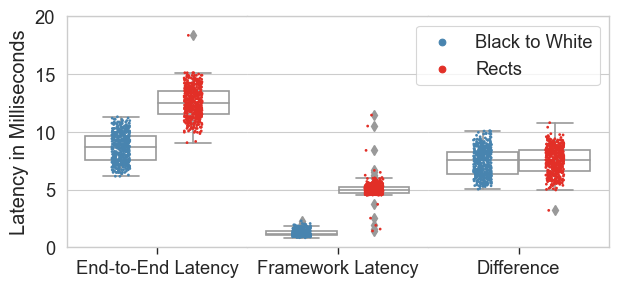

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(7, 3), sharey=True)

s = 2

plt.subplots_adjust(wspace=0)

#plt.sharey()

#sns.set_style('whitegrid')
#sns.set_context('paper')

axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[2].spines['left'].set_visible(False)

axes[0].set_ylim(0, 20)
axes[1].set_ylim(0, 20)
axes[2].set_ylim(0, 20)

#plt.ylabel('')

p = 'Blues'
p = palette_burd

sns.boxplot(data=df_tmp, x='framework', y='ete', hue='apptype', palette=palette_white, ax=axes[0])
sns.stripplot(data=df_tmp, x='framework', y='ete', hue='apptype', dodge=True, size=s, palette=p, ax=axes[0])
sns.boxplot(data=df_tmp, x='framework', y='fw', hue='apptype', palette=palette_white, ax=axes[1])
sns.stripplot(data=df_tmp, x='framework', y='fw', hue='apptype', dodge=True, size=s, palette=p, ax=axes[1])
sns.boxplot(data=df_tmp, x='framework', y='diff', hue='apptype', palette=palette_white, ax=axes[2])
sns.stripplot(data=df_tmp, x='framework', y='diff', hue='apptype', dodge=True, size=s, palette=p, ax=axes[2])

axes[0].set_ylabel('Latency in Milliseconds')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')

axes[0].set_xticklabels(['End-to-End Latency'])
axes[1].set_xticklabels(['Framework Latency'])
axes[2].set_xticklabels(['Difference'])

#b.legend('')
axes[0].get_legend().remove()
axes[1].get_legend().remove()

handles, labels = axes[1].get_legend_handles_labels()
axes[2].legend(handles[2:4], ['Black to White', 'Rects'])
#axes[0].legend(handles[3:6], ['Black to White', 'Rects', 'Image'])
#, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#handles, labels = fig_vera_annotations_swarm.get_legend_handles_labels()
#l = plt.legend(handles[0:3], ['Paper', 'PC', 'Tablet'])

if RENDER:
    plt.savefig('img/difference.png', dpi=150)

/tmp/ipykernel_483632/2560611727.py:32: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.stripplot(data=df_tmp, x='framework', y='ete', hue='apptype', dodge=True, size=s, palette=p, ax=axes[0])
/tmp/ipykernel_483632/2560611727.py:35: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.stripplot(data=df_tmp, x='framework', y='fw', hue='apptype', dodge=True, size=s, palette=p, ax=axes[1])
/tmp/ipykernel_483632/2560611727.py:38: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.stripplot(data=df_tmp, x='framework', y='diff', hue='apptype', dodge=True, size=s, palette=p, ax=axes[2])


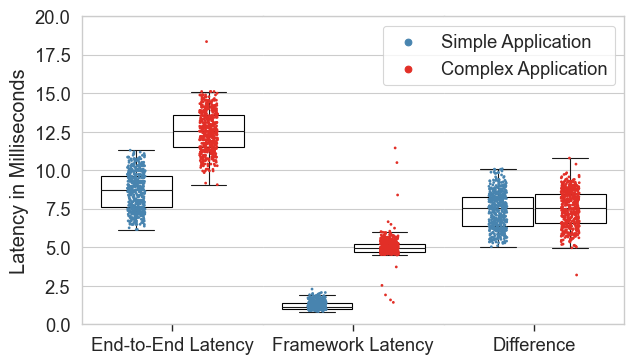

In [113]:
# Poster

fig, axes = plt.subplots(1, 3, figsize=(7, 4), sharey=True)

s = 2

lw = 0.8

plt.subplots_adjust(wspace=0)

#plt.sharey()

#sns.set_style('whitegrid')
#sns.set_context('paper')

axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[2].spines['left'].set_visible(False)

axes[0].set_ylim(0, 20)
axes[1].set_ylim(0, 20)
axes[2].set_ylim(0, 20)

#plt.ylabel('')

p = 'Blues'
p = palette_burd

sns.boxplot(data=df_tmp, x='framework', y='ete', hue='apptype', palette=palette_white, showfliers=False, ax=axes[0],
            boxprops = dict(linewidth=lw, edgecolor='black'))
sns.stripplot(data=df_tmp, x='framework', y='ete', hue='apptype', dodge=True, size=s, palette=p, ax=axes[0])
sns.boxplot(data=df_tmp, x='framework', y='fw', hue='apptype', palette=palette_white, showfliers=False, ax=axes[1],
            boxprops = dict(linewidth=lw, edgecolor='black'))
sns.stripplot(data=df_tmp, x='framework', y='fw', hue='apptype', dodge=True, size=s, palette=p, ax=axes[1])
sns.boxplot(data=df_tmp, x='framework', y='diff', hue='apptype', palette=palette_white, showfliers=False, ax=axes[2],
            boxprops = dict(linewidth=lw, edgecolor='black'))
sns.stripplot(data=df_tmp, x='framework', y='diff', hue='apptype', dodge=True, size=s, palette=p, ax=axes[2])

plt.setp(axes[0].artists, edgecolor = 'k', facecolor='w')
plt.setp(axes[0].lines, color='k', linewidth=lw)
plt.setp(axes[1].artists, edgecolor = 'k', facecolor='w')
plt.setp(axes[1].lines, color='k', linewidth=lw)
plt.setp(axes[2].artists, edgecolor = 'k', facecolor='w')
plt.setp(axes[2].lines, color='k', linewidth=lw)



axes[0].set_ylabel('Latency in Milliseconds')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')

axes[0].set_xticklabels(['End-to-End Latency'])
axes[1].set_xticklabels(['Framework Latency'])
axes[2].set_xticklabels(['Difference'])

#b.legend('')
axes[0].get_legend().remove()
axes[1].get_legend().remove()

handles, labels = axes[1].get_legend_handles_labels()
axes[2].legend(handles[2:4], ['Simple Application', 'Complex Application'])
#axes[0].legend(handles[3:6], ['Black to White', 'Rects', 'Image'])
#, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#handles, labels = fig_vera_annotations_swarm.get_legend_handles_labels()
#l = plt.legend(handles[0:3], ['Paper', 'PC', 'Tablet'])

#if RENDER:
#plt.savefig('img/difference_poster.png', dpi=1200)


plt.savefig('img/difference_poster.svg')

In [13]:

desktop = 'plasma'
compositor = 'on'

df_tmp = df[(df['desktop'] == desktop) & (df['compositor'] == compositor)]
df_tmp




,index,id,framework,fw_running,ete,fw,diff,compositor,desktop,apptype,desktop_comp,fw_de_co_re
27000,0,0,GTK3,True,12.100,3.608,8.492,on,plasma,default,"plasma, on",GTK3_plasma_on_default
27001,1,1,GTK3,True,10.428,3.068,7.360,on,plasma,default,"plasma, on",GTK3_plasma_on_default
27002,2,2,GTK3,True,9.972,2.973,6.999,on,plasma,default,"plasma, on",GTK3_plasma_on_default
27003,3,3,GTK3,True,11.328,3.564,7.764,on,plasma,default,"plasma, on",GTK3_plasma_on_default
27004,4,4,GTK3,True,11.760,3.940,7.820,on,plasma,default,"plasma, on",GTK3_plasma_on_default
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,495,495,Xlib,True,17.136,10.882,6.254,on,plasma,rects,"plasma, on",Xlib_plasma_on_rects
44996,496,496,Xlib,True,17.924,9.445,8.479,on,plasma,rects,"plasma, on",Xlib_plasma_on_rects
44997,497,497,Xlib,True,18.384,10.650,7.734,on,plasma,rects,"plasma, on",Xlib_plasma_on_rects
44998,498,498,Xlib,True,16.808,9.246,7.562,on,plasma,rects,"plasma, on",Xlib_plasma_on_rects


['FLTK', 'GLEW', 'GLUT', 'GTK3', 'Java Swing', 'Java2D', 'SDL2 (OpenGL)', 'SDL2 (OpenGLES2)', 'SDL2 (Software)', 'XCB', 'Xlib', 'pygame', 'pyglet', 'tkinter', 'wxPython']
['xfce4, on', 'plasma, on', 'xfce4, off', 'plasma, off', 'xorg, off', 'xfce4, on', 'plasma, on', 'xfce4, off', 'plasma, off', 'xorg, off']


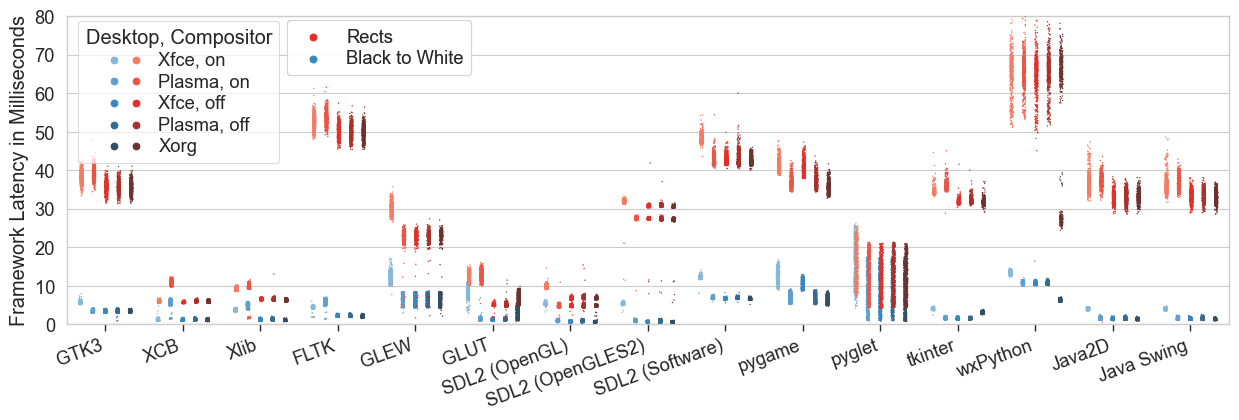

In [14]:
df_tmp = df[(df['apptype'] == 'default') & (~df['framework'].isin(['Qt5', 'PyQt5', 'PyQt6']))]


fws = df_tmp['framework'].unique()

order = list(fw_mapping.values())
order.remove('Qt5')
order.remove('PyQt5')
order.remove('PyQt6')


print(sorted(fws))


fig = plt.figure(figsize=(15, 4))


ax = plt.gca()

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

#plt.axhline(df_tmp['fw'].median(), color='red')

#print(df_tmp['fw'].median())

#sns.pointplot(data=df_tmp, x='framework', y='diff', hue='desktop_comp', join=False, ci='sd', dodge=True, palette='Blues_d', size=8)
#sns.violinplot(data=df_tmp, x='framework', y='diff', hue='rects', join=False, ci='sd', dodge=True, palette='Blues', split=False)
#sns.boxplot(data=df_tmp, x='framework', y='fw', hue='desktop_comp', palette='Blues')
sns.stripplot(data=df_tmp, x='framework', y='fw', hue='desktop_comp', palette='Blues_d', dodge=True, size=1, order=order, axes=ax)

df_tmp = df[(df['apptype'] == 'rects') & (~df['framework'].isin(['Qt5', 'PyQt5', 'PyQt6']))]
#sns.boxplot(data=df_tmp, x='framework', y='fw', hue='desktop_comp', palette='Reds')
sns.stripplot(data=df_tmp, x='framework', y='fw', hue='desktop_comp', palette='Reds_d', dodge=True, size=1, order=order, axes=ax, transform=offset(0.01)+trans)

if IMAGE:
    df_tmp = df[(df['apptype'] == 'image') & (~df['framework'].isin(['Qt5', 'PyQt5', 'PyQt6']))]
    sns.stripplot(data=df_tmp, x='framework', y='fw', hue='desktop_comp', palette='Greens_d', dodge=True, size=1, order=order, axes=ax, transform=offset(0.02)+trans)


ax.set_ylim(0, 80)

handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[0:2], ['Black to White', 'Rects'])

ax.set_xlabel('')
ax.set_ylabel('Framework Latency in Milliseconds')



plt.xticks(rotation=20, ha='right')

print(labels)

handle_tuples = [(handles[0], handles[5]),
                 (handles[1], handles[6]),
                 (handles[2], handles[7]),
                 (handles[3], handles[8]),
                 (handles[4], handles[9])]

l = ax.legend(handle_tuples, ['Xfce, on', 'Plasma, on', 'Xfce, off', 'Plasma, off', 'Xorg'], handler_map={tuple: HandlerTuple(ndivide=None)}, title='Desktop, Compositor', loc=(0.01, 0.525), framealpha=0.7, labelspacing=0.2)
l2 = plt.legend([handles[7], handles[2]], ['Rects', 'Black to White'], handler_map={tuple: HandlerTuple(ndivide=None)}, title='', loc=(0.19, 0.81), framealpha=0.7, labelspacing=0.2)
#pyplot.legend([l[0] for l in plot_lines], parameters, loc=4)
ax.add_artist(l)
ax.add_artist(l2)

if RENDER:
    plt.savefig('img/framework_latency.png', dpi=300, bbox_inches='tight')

['FLTK', 'GLEW', 'GLUT', 'GTK3', 'Java Swing', 'Java2D', 'SDL2 (OpenGL)', 'SDL2 (OpenGLES2)', 'SDL2 (Software)', 'XCB', 'Xlib', 'pygame', 'pyglet', 'tkinter', 'wxPython']


/tmp/ipykernel_560911/3497577937.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


['xfce4, on', 'plasma, on', 'xfce4, off', 'plasma, off', 'xorg, off', 'xfce4, on', 'plasma, on', 'xfce4, off', 'plasma, off', 'xorg, off']


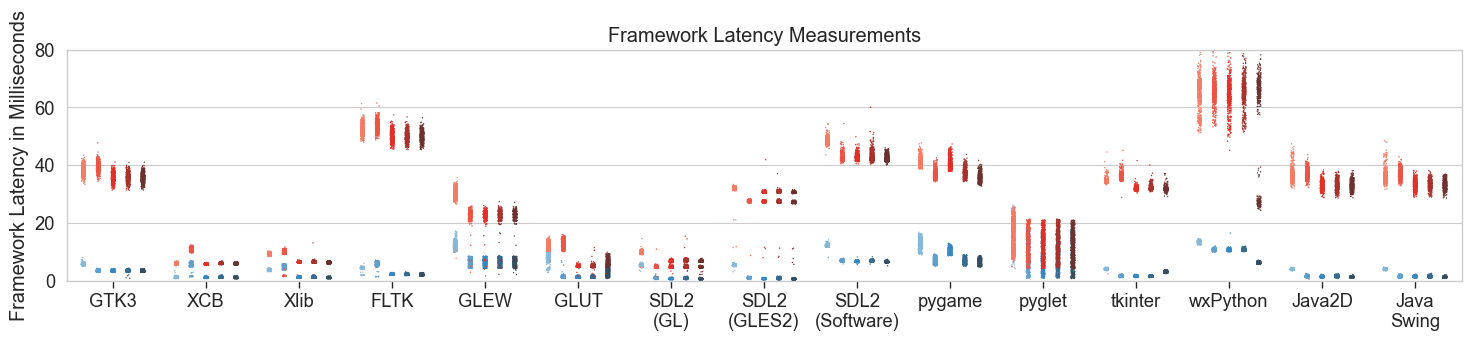

In [15]:
# Poster

df_tmp = df[(df['apptype'] == 'default') & (~df['framework'].isin(['Qt5', 'PyQt5', 'PyQt6']))]


fws = df_tmp['framework'].unique()

order = list(fw_mapping.values())
order.remove('Qt5')
order.remove('PyQt5')
order.remove('PyQt6')


print(sorted(fws))


fig = plt.figure(figsize=(18, 3)) # 15 4


ax = plt.gca()

dpi=1200.

offset = lambda p: transforms.ScaledTranslation(p/dpi,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

#plt.axhline(df_tmp['fw'].median(), color='red')

#print(df_tmp['fw'].median())

#sns.pointplot(data=df_tmp, x='framework', y='diff', hue='desktop_comp', join=False, ci='sd', dodge=True, palette='Blues_d', size=8)
#sns.violinplot(data=df_tmp, x='framework', y='diff', hue='rects', join=False, ci='sd', dodge=True, palette='Blues', split=False)
#sns.boxplot(data=df_tmp, x='framework', y='fw', hue='desktop_comp', palette='Blues')
sns.stripplot(data=df_tmp, x='framework', y='fw', hue='desktop_comp', palette='Blues_d', dodge=True, size=1, order=order, axes=ax)

df_tmp = df[(df['apptype'] == 'rects') & (~df['framework'].isin(['Qt5', 'PyQt5', 'PyQt6']))]
#sns.boxplot(data=df_tmp, x='framework', y='fw', hue='desktop_comp', palette='Reds')
sns.stripplot(data=df_tmp, x='framework', y='fw', hue='desktop_comp', palette='Reds_d', dodge=True, size=1, order=order, axes=ax, transform=offset(0.02)+trans)

if IMAGE:
    df_tmp = df[(df['apptype'] == 'image') & (~df['framework'].isin(['Qt5', 'PyQt5', 'PyQt6']))]
    sns.stripplot(data=df_tmp, x='framework', y='fw', hue='desktop_comp', palette='Greens_d', dodge=True, size=1, order=order, axes=ax, transform=offset(0.02)+trans)



labels = order

labels = [label.replace(' ', '\n') for label in labels]
labels = [label.replace('Open', '') for label in labels]

ax.set_xticklabels(labels)

    
ax.set_ylim(0, 80)

handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[0:2], ['Black to White', 'Rects'])

ax.set_xlabel('')
ax.set_ylabel('Framework Latency in Milliseconds')



#plt.xticks(rotation=20, ha='right')

print(labels)

handle_tuples = [(handles[0], handles[5]),
                 (handles[1], handles[6]),
                 (handles[2], handles[7]),
                 (handles[3], handles[8]),
                 (handles[4], handles[9])]

#l = ax.legend(handle_tuples, ['Xfce, on', 'Plasma, on', 'Xfce, off', 'Plasma, off', 'Xorg'], handler_map={tuple: HandlerTuple(ndivide=None)}, title='Desktop, Compositor', loc=(0.01, 0.6), framealpha=0.7, labelspacing=0.2)
#l2 = plt.legend([handles[2], handles[7]], ['Simple Applications', 'Complex Application'], handler_map={tuple: HandlerTuple(ndivide=None)}, title='', loc=(0.19, 0.81), framealpha=0.7, labelspacing=0.2)

#ax.add_artist(l)
#ax.add_artist(l2)

ax.get_legend().remove()

ax.set_title('Framework Latency Measurements')

#if RENDER:
plt.savefig('img/framework_latency_poster.png', dpi=dpi, bbox_inches='tight')

#plt.savefig('img/framework_latency_poster.svg')

['FLTK', 'GLEW', 'GLUT', 'GTK3', 'Java Swing', 'Java2D', 'PyQt5', 'PyQt6', 'Qt5', 'SDL2 (OpenGL)', 'SDL2 (OpenGLES2)', 'SDL2 (Software)', 'XCB', 'Xlib', 'pygame', 'pyglet', 'tkinter', 'wxPython']
['xfce4, on', 'plasma, on', 'xfce4, off', 'plasma, off', 'xorg, off', 'xfce4, on', 'plasma, on', 'xfce4, off', 'plasma, off', 'xorg, off']


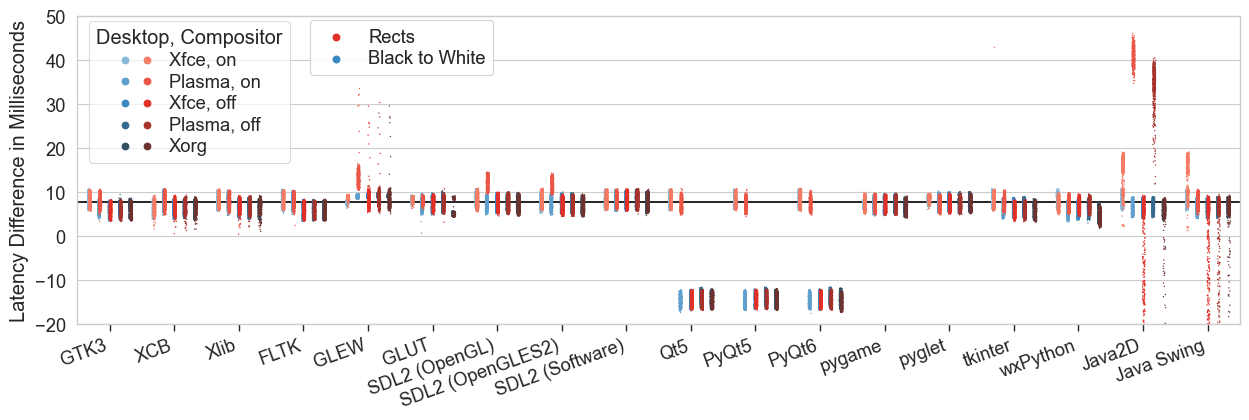

In [15]:
df_tmp = df[(df['apptype'] == 'default')]


fws = df_tmp['framework'].unique()

print(sorted(fws))

order = list(fw_mapping.values())

fig = plt.figure(figsize=(15, 4))


#plt.axhline(ci[0], color='gray', linestyle='--')
plt.axhline(agg_mean, color='black')
#plt.axhline(ci[1], color='gray', linestyle='--')

#print(df['diff'].median())

#plt.axhline(df_tmp['fw'].median(), color='red')

#print(df_tmp['fw'].median())

ax = plt.gca()

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData



#sns.pointplot(data=df_tmp, x='framework', y='diff', hue='desktop_comp', join=False, ci='sd', dodge=True, palette='Blues_d', size=8)
#sns.violinplot(data=df_tmp, x='framework', y='diff', hue='rects', join=False, ci='sd', dodge=True, palette='Blues', split=False)
#sns.boxplot(data=df_tmp, x='framework', y='fw', hue='desktop_comp', palette='Blues')
sns.stripplot(data=df_tmp, x='framework', y='diff', hue='desktop_comp', palette='Blues_d', dodge=True, size=1, order=order)

df_tmp = df[(df['apptype'] == 'rects')]
#sns.boxplot(data=df_tmp, x='framework', y='fw', hue='desktop_comp', palette='Reds')
sns.stripplot(data=df_tmp, x='framework', y='diff', hue='desktop_comp', palette='Reds_d', dodge=True, size=1, order=order, transform=offset(0.01)+trans)

if IMAGE:
    df_tmp = df[(df['apptype'] == 'image')]
    sns.stripplot(data=df_tmp, x='framework', y='diff', hue='desktop_comp', palette='Greens_d', dodge=True, size=1, order=order)




#ax.set_ylim(-20, 50)
ax.set_ylim(-20, 50)

handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[0:2], ['Black to White', 'Rects'])

ax.set_xlabel('')
ax.set_ylabel('Latency Difference in Milliseconds')



plt.xticks(rotation=20, ha='right')

print(labels)

handle_tuples = [(handles[0], handles[5]),
                 (handles[1], handles[6]),
                 (handles[2], handles[7]),
                 (handles[3], handles[8]),
                 (handles[4], handles[9])]

#l = ax.legend(handle_tuples, ['Xfce, on', 'Plasma, on', 'Xfce, off', 'Plasma, off', 'Xorg'], handler_map={tuple: HandlerTuple(ndivide=None)}, title='Desktop, Compositor', loc='upper left', framealpha=0.5)


l = ax.legend(handle_tuples, ['Xfce, on', 'Plasma, on', 'Xfce, off', 'Plasma, off', 'Xorg'], handler_map={tuple: HandlerTuple(ndivide=None)}, title='Desktop, Compositor', loc=(0.01, 0.525), framealpha=0.7, labelspacing=0.2) # loc=(0.815, 0.525)
l2 = plt.legend([handles[7], handles[2]], ['Rects', 'Black to White'], handler_map={tuple: HandlerTuple(ndivide=None)}, title='', loc=(0.2, 0.81), framealpha=0.7, labelspacing=0.2) # loc=(0.69, 0.81)
#pyplot.legend([l[0] for l in plot_lines], parameters, loc=4)
ax.add_artist(l)
ax.add_artist(l2)

if RENDER:
    plt.savefig('img/diff_all.png', dpi=300, bbox_inches='tight')

['FLTK', 'GLEW', 'GLUT', 'GTK3', 'Java Swing', 'Java2D', 'PyQt5', 'PyQt6', 'Qt5', 'SDL2 (OpenGL)', 'SDL2 (OpenGLES2)', 'SDL2 (Software)', 'XCB', 'Xlib', 'pygame', 'pyglet', 'tkinter', 'wxPython']


/tmp/ipykernel_560911/2878714819.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


['xfce4, on', 'plasma, on', 'xfce4, off', 'plasma, off', 'xorg, off', 'xfce4, on', 'plasma, on', 'xfce4, off', 'plasma, off', 'xorg, off']


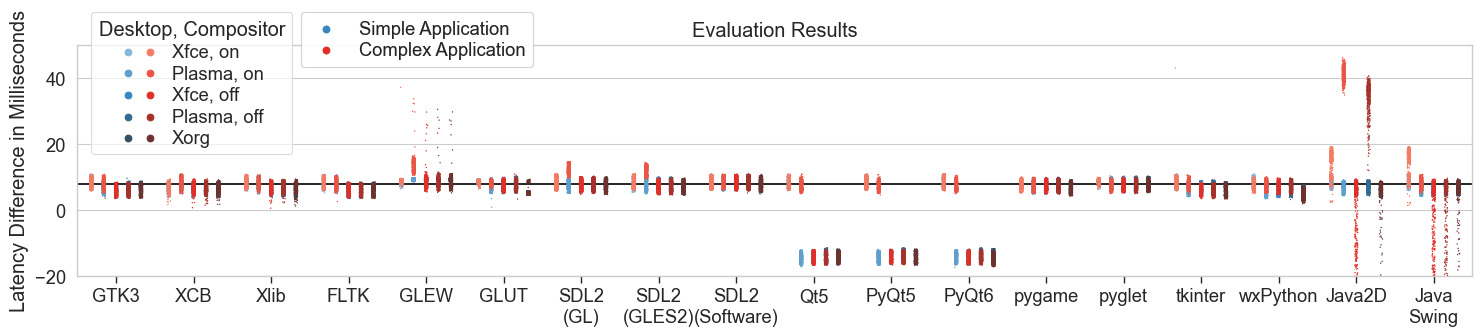

In [14]:
# Poster

df_tmp = df[(df['apptype'] == 'default')]


fws = df_tmp['framework'].unique()

print(sorted(fws))

order = list(fw_mapping.values())

fig = plt.figure(figsize=(18, 3))


#plt.axhline(ci[0], color='gray', linestyle='--')
plt.axhline(agg_mean, color='black')
#plt.axhline(ci[1], color='gray', linestyle='--')

#print(df['diff'].median())

#plt.axhline(df_tmp['fw'].median(), color='red')

#print(df_tmp['fw'].median())

ax = plt.gca()

dpi=1200.

offset = lambda p: transforms.ScaledTranslation(p/dpi,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData



#sns.pointplot(data=df_tmp, x='framework', y='diff', hue='desktop_comp', join=False, ci='sd', dodge=True, palette='Blues_d', size=8)
#sns.violinplot(data=df_tmp, x='framework', y='diff', hue='rects', join=False, ci='sd', dodge=True, palette='Blues', split=False)
#sns.boxplot(data=df_tmp, x='framework', y='fw', hue='desktop_comp', palette='Blues')
sns.stripplot(data=df_tmp, x='framework', y='diff', hue='desktop_comp', palette='Blues_d', dodge=True, size=1, order=order)

df_tmp = df[(df['apptype'] == 'rects')]
#sns.boxplot(data=df_tmp, x='framework', y='fw', hue='desktop_comp', palette='Reds')
sns.stripplot(data=df_tmp, x='framework', y='diff', hue='desktop_comp', palette='Reds_d', dodge=True, size=1, order=order, transform=offset(0.02)+trans)

if IMAGE:
    df_tmp = df[(df['apptype'] == 'image')]
    sns.stripplot(data=df_tmp, x='framework', y='diff', hue='desktop_comp', palette='Greens_d', dodge=True, size=1, order=order)


labels = order

labels = [label.replace(' ', '\n') for label in labels]
labels = [label.replace('Open', '') for label in labels]

ax.set_xticklabels(labels)


#ax.set_ylim(-20, 50)
ax.set_ylim(-20, 50)

handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[0:2], ['Black to White', 'Rects'])

ax.set_xlabel('')
ax.set_ylabel('Latency Difference in Milliseconds')



#plt.xticks(rotation=20, ha='right')

print(labels)

handle_tuples = [(handles[0], handles[5]),
                 (handles[1], handles[6]),
                 (handles[2], handles[7]),
                 (handles[3], handles[8]),
                 (handles[4], handles[9])]

#l = ax.legend(handle_tuples, ['Xfce, on', 'Plasma, on', 'Xfce, off', 'Plasma, off', 'Xorg'], handler_map={tuple: HandlerTuple(ndivide=None)}, title='Desktop, Compositor', loc='upper left', framealpha=0.5)


l = ax.legend(handle_tuples, ['Xfce, on', 'Plasma, on', 'Xfce, off', 'Plasma, off', 'Xorg'], handler_map={tuple: HandlerTuple(ndivide=None)}, title='Desktop, Compositor', loc=(0.01, 0.525), framealpha=0.7, labelspacing=0.2) # loc=(0.815, 0.525)
l2 = plt.legend([handles[2], handles[7]], ['Simple Application', 'Complex Application'], handler_map={tuple: HandlerTuple(ndivide=None)}, title='', loc=(0.16, 0.905), framealpha=0.7, labelspacing=0.2) # loc=(0.69, 0.81)
#pyplot.legend([l[0] for l in plot_lines], parameters, loc=4)
ax.add_artist(l)
ax.add_artist(l2)


ax.set_title('Evaluation Results')


plt.savefig('img/diff_all_poster.png', dpi=dpi, bbox_inches='tight')

#plt.savefig('img/diff_all_poster.svg')

In [16]:
print('median', df['diff'].median())
print('mean', df['diff'].mean())
print('std', df['diff'].std())

df_tmp = df[(~df['framework'].isin(['Qt5', 'PyQt5', 'PyQt6']))]


print('median', df_tmp['diff'].median())
print('mean', df_tmp['diff'].mean())
print('std', df_tmp['diff'].std())

median 7.145
mean 5.316053312500001
std 7.891368795655674
median 7.383
mean 7.719840987654321
std 4.157649425952045


In [17]:
exclude = []
means = []

for perm in df['fw_de_co_re'].unique():
    if df[df['fw_de_co_re'] == perm]['diff'].min() < 0:
        exclude.append(perm)
    if perm not in exclude:
        means.append(df_tmp['diff'].mean())

print(exclude)

num_excluded = len(exclude)
num_total = len(df['fw_de_co_re'].unique())

print(len(exclude), len(df['fw_de_co_re'].unique()), len(exclude) / len(df['fw_de_co_re'].unique()))

#for perm in include:
#    df_tmp = df[df['fw_de_co_re'] == perm]
#    #print(perm, 'mean', df_tmp['diff'].mean(), 'std', df_tmp['diff'].std())

agg_mean = round(np.mean(means), 1)
agg_std = round(np.std(means), 1)
ci = st.t.interval(alpha=0.95, df=len(means)-1, loc=np.mean(means), scale=st.sem(means))

print(agg_mean)
print(agg_std)
print(ci)

['PyQt5_plasma_on_default', 'PyQt6_plasma_on_default', 'Qt5_plasma_on_default', 'PyQt5_xfce4_off_default', 'PyQt6_xfce4_off_default', 'Qt5_xfce4_off_default', 'Java2D_xfce4_off_rects', 'Java Swing_xfce4_off_rects', 'PyQt5_xfce4_off_rects', 'PyQt6_xfce4_off_rects', 'Qt5_xfce4_off_rects', 'PyQt5_plasma_off_default', 'PyQt6_plasma_off_default', 'Qt5_plasma_off_default', 'Java Swing_plasma_off_rects', 'PyQt5_plasma_off_rects', 'PyQt6_plasma_off_rects', 'Qt5_plasma_off_rects', 'PyQt5_xorg_off_default', 'PyQt6_xorg_off_default', 'Qt5_xorg_off_default', 'Java2D_xorg_off_rects', 'Java Swing_xorg_off_rects', 'PyQt5_xorg_off_rects', 'PyQt6_xorg_off_rects', 'Qt5_xorg_off_rects']
26 180 0.14444444444444443
7.7
0.0
(nan, nan)


/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [18]:
df_tmp = df[~df['fw_de_co_re'].isin(exclude)]

print('median', df_tmp['diff'].median())
print('mean', df_tmp['diff'].mean())
print('std', df_tmp['diff'].std())

median 7.434
mean 7.864057915662651
std 3.813090177086552


In [19]:
df_tmp = df[(~df['fw_de_co_re'].isin(exclude)) & (df['compositor'] == 'on')]

print('median', df_tmp['diff'].median())
print('mean', df_tmp['diff'].mean())
print('std', df_tmp['diff'].std())

median 8.035
mean 8.647176972222221
std 4.354937029829363


In [20]:
df_tmp = df[(~df['fw_de_co_re'].isin(exclude)) & (df['compositor'] == 'off')]

print('median', df_tmp['diff'].median())
print('mean', df_tmp['diff'].mean())
print('std', df_tmp['diff'].std())

median 7.01
mean 7.264222042553191
std 3.2125433553480542


In [21]:
print(np.mean(means))
print(np.std(means))

7.719840987654321
0.0


In [22]:
agg_mean = round(np.mean(means), 1)
agg_std = round(np.std(means), 1)

errors = []

for m in means:
    errors.append(np.abs(agg_mean - m))
    
np.mean(errors)

0.019840987654320408

In [23]:
ci = st.t.interval(alpha=0.95, df=len(means)-1, loc=np.mean(means), scale=st.sem(means))

/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [24]:
print('\\newcommand\\nexcluded{' + str(num_excluded) + '\\addspace}')
print('\\newcommand\\ntotal{' + str(num_total) + '\\addspace}')
print('\\newcommand\\aggmean{' + str(agg_mean) + '\\addspace}')
print('\\newcommand\\aggstd{' + str(agg_std) + '\\addspace}')
print('\\newcommand\\cilow{' + str(round(ci[0], 1)) + '\\addspace}')
print('\\newcommand\\cihigh{' + str(round(ci[1], 1)) + '\\addspace}')

\newcommand\nexcluded{26\addspace}
\newcommand\ntotal{180\addspace}
\newcommand\aggmean{7.7\addspace}
\newcommand\aggstd{0.0\addspace}
\newcommand\cilow{nan\addspace}
\newcommand\cihigh{nan\addspace}
